In [28]:
# Python 3
import http.client, urllib.parse
import json
import pprint
import yfinance
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.linear_model as SKmodels

# API keys

In [2]:
API_STOCK_DATA = "Ab0Eq9OSOkVaNe9eluoMjkxSgnrFk46h08ghta6w"
API_ALPHA_VANTAGE = "Y55JGW1SYPKKETDD"

# Stock data API

In [3]:
# conn = http.client.HTTPSConnection('api.stockdata.org')
#
# params = urllib.parse.urlencode({
#     'api_token': API_STOCK_DATA,
#     'symbols': 'AAPL',
#     'interval': 'minute',
#     'date_from': '2021-01-01',
#     'date_to': '2022-01-01'
#     })
#
# conn.request('GET', '/v1/data/intraday?{}'.format(params))
#
# res = conn.getresponse()
# data = res.read()
# json.loads(data.decode('utf-8'))

# Alpha vantage

In [4]:
# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=1min&apikey={API_ALPHA_VANTAGE}'
# r = requests.get(url)
# dataVIX = r.json()
# dataVIX

# Yfinance

,VIX_Open,VIX_High,VIX_Low,VIX_Close,VIX_Volume,VIX_Dividends,VIX_Stock Splits
Datetime,,,,,,,
2022-04-19 14:31:00+01:00,22.500000,22.570000,22.459999,22.570000,0,0,0
2022-04-19 14:32:00+01:00,22.620001,22.660000,22.620001,22.629999,0,0,0
2022-04-19 14:33:00+01:00,22.570000,22.570000,22.450001,22.450001,0,0,0
2022-04-19 14:34:00+01:00,22.469999,22.469999,22.379999,22.379999,0,0,0
2022-04-19 14:35:00+01:00,22.430000,22.500000,22.430000,22.500000,0,0,0
...,...,...,...,...,...,...,...
2022-04-27 20:56:00+01:00,31.910000,32.040001,31.910000,32.040001,0,0,0
2022-04-27 20:57:00+01:00,32.020000,32.099998,32.020000,32.060001,0,0,0
2022-04-27 20:58:00+01:00,32.060001,32.150002,32.060001,32.150002,0,0,0


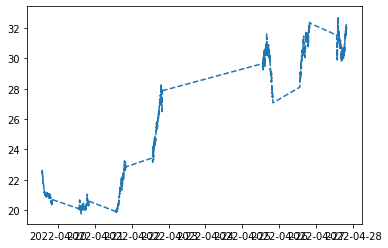

In [5]:
# Download VIX information
ticker = yfinance.Ticker('^VIX')
VIX = ticker.history(interval='1m', period='7d')
VIX.index = pd.to_datetime(VIX.index).tz_convert(tz='Europe/London')
VIX.columns = [f"VIX_{_}" for _ in VIX.columns]
plt.plot(VIX.VIX_Open, '--')
VIX

,CHFJPY_Open,CHFJPY_High,CHFJPY_Low,CHFJPY_Close,CHFJPY_Volume,CHFJPY_Dividends,CHFJPY_Stock Splits
Datetime,,,,,,,
2022-04-19 00:00:00+01:00,134.516998,134.528000,134.509995,134.526993,0,0,0
2022-04-19 00:01:00+01:00,134.524994,134.526001,134.505997,134.524002,0,0,0
2022-04-19 00:02:00+01:00,134.522995,134.539001,134.509995,134.533005,0,0,0
2022-04-19 00:03:00+01:00,134.520004,134.539993,134.520004,134.535004,0,0,0
2022-04-19 00:04:00+01:00,134.535995,134.537994,134.520004,134.533997,0,0,0
...,...,...,...,...,...,...,...
2022-04-27 20:58:00+01:00,132.419998,132.438995,132.410004,132.421997,0,0,0
2022-04-27 20:59:00+01:00,132.425995,132.466995,132.410004,132.462997,0,0,0
2022-04-27 21:00:00+01:00,132.464005,132.507004,132.449997,132.503998,0,0,0


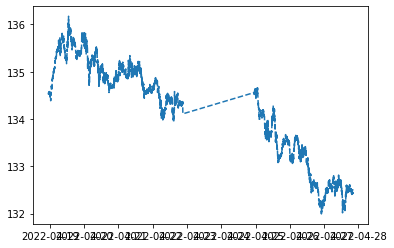

In [6]:
# Download CHFJPY information
ticker = yfinance.Ticker('CHFJPY=X')
CHFJPY = ticker.history(interval='1m', period='7d').iloc[:-15]
CHFJPY.index = pd.to_datetime(CHFJPY.index).tz_convert(tz='Europe/London')
CHFJPY.columns = [f"CHFJPY_{_}" for _ in CHFJPY.columns]
plt.plot(CHFJPY.CHFJPY_Open, '--')
CHFJPY

,GOLD_Open,GOLD_High,GOLD_Low,GOLD_Close,GOLD_Volume,GOLD_Dividends,GOLD_Stock Splits
Datetime,,,,,,,
2022-04-20 05:00:00+01:00,1945.699951,1946.000000,1945.599976,1945.599976,0,0,0
2022-04-20 05:01:00+01:00,1945.300049,1945.400024,1945.000000,1945.300049,75,0,0
2022-04-20 05:02:00+01:00,1945.300049,1945.599976,1945.199951,1945.400024,66,0,0
2022-04-20 05:03:00+01:00,1945.500000,1945.599976,1945.400024,1945.400024,8,0,0
2022-04-20 05:04:00+01:00,1945.199951,1945.199951,1941.000000,1943.599976,894,0,0
...,...,...,...,...,...,...,...
2022-04-27 20:49:00+01:00,1886.900024,1887.599976,1886.900024,1887.199951,72,0,0
2022-04-27 20:50:00+01:00,1887.199951,1887.300049,1887.000000,1887.300049,70,0,0
2022-04-27 20:51:00+01:00,1887.199951,1887.199951,1886.699951,1886.699951,122,0,0


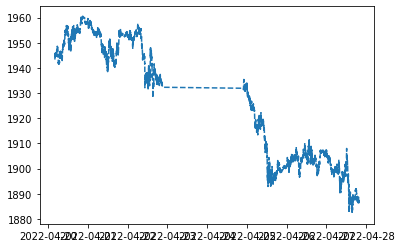

In [7]:
# Download Gold information
ticker = yfinance.Ticker('GC=F')
GOLD = ticker.history(interval='1m', period='7d').iloc[:-15]
GOLD.index = pd.to_datetime(GOLD.index).tz_convert(tz='Europe/London')
GOLD.columns = [f"GOLD_{_}" for _ in GOLD.columns]
plt.plot(GOLD.GOLD_Open, '--')
GOLD

In [84]:
# Merge both dataFrames. Cut part with causes by yahooFinance shift of VIX
merged = CHFJPY.merge(VIX, left_index=True, right_index=True, how='left')
nan = np.any(merged.isna(), axis=1)
nan = nan.where(np.logical_not(nan)).first_valid_index()
merged = merged.loc[nan:]
merged['FiniteVixData'] = np.any(merged.isna(), axis=1)[nan:]
merged[VIX.columns] = merged[VIX.columns].fillna(method='ffill')

merged = merged.merge(GOLD, left_index=True, right_index=True, how='left')
nan = np.any(merged.isna(), axis=1)
nan = nan.where(np.logical_not(nan)).first_valid_index()
merged = merged.loc[nan:]
merged['FiniteGOLDData'] = np.any(merged.isna(), axis=1)[nan:]
merged[GOLD.columns] = merged[GOLD.columns].fillna(method='ffill')
merged.drop(['CHFJPY_Volume', 'CHFJPY_Dividends',
             'CHFJPY_Stock Splits', 'VIX_Volume', 'VIX_Dividends', 'VIX_Stock Splits',
             'GOLD_Stock Splits', 'GOLD_Dividends', 'GOLD_Volume'],
            axis=1, inplace=True)

del nan
# Create Mean by rolling on rollParam value.
rollParam = 100
CHFJPY_roll = merged.rolling(rollParam)['CHFJPY_Open']
merged['CHFJPY_Vol'] = CHFJPY_roll.std()
merged['CHFJPY_Mean'] = CHFJPY_roll.mean()

VIX_roll = merged.rolling(rollParam)['VIX_Open']
merged['VIX_Vol'] = VIX_roll.std()
merged['VIX_Mean'] = VIX_roll.mean()

GOLD_roll = merged.rolling(rollParam)['GOLD_Open']
merged['GOLD_Vol'] = GOLD_roll.std()
merged['GOLD_Mean'] = GOLD_roll.mean()

merged = merged.iloc[rollParam:]
merged['CHFJPY_Mean_Future'] = merged['CHFJPY_Mean'].shift(-rollParam)
merged = merged.iloc[:-rollParam]
del CHFJPY_roll, VIX_roll, GOLD_roll

merged

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2688/141604924.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['CHFJPY_Mean_Future'] = merged['CHFJPY_Mean'].shift(-rollParam)


,CHFJPY_Open,CHFJPY_High,CHFJPY_Low,CHFJPY_Close,VIX_Open,VIX_High,VIX_Low,VIX_Close,FiniteVixData,GOLD_Open,...,GOLD_Low,GOLD_Close,FiniteGOLDData,CHFJPY_Vol,CHFJPY_Mean,VIX_Vol,VIX_Mean,GOLD_Vol,GOLD_Mean,CHFJPY_Mean_Future
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-20 06:40:00+01:00,135.320007,135.324005,135.300003,135.313995,20.709999,20.719999,20.709999,20.709999,True,1947.500000,...,1947.400024,1947.400024,False,0.078399,135.173860,0.000000,20.709999,1.069645,1945.890000,135.26767
2022-04-20 06:41:00+01:00,135.309998,135.350998,135.300003,135.330002,20.709999,20.719999,20.709999,20.709999,True,1947.400024,...,1947.400024,1948.000000,False,0.077824,135.176850,0.000000,20.709999,1.078523,1945.911000,135.26608
2022-04-20 06:42:00+01:00,135.339996,135.339996,135.289993,135.319000,20.709999,20.719999,20.709999,20.709999,True,1947.800049,...,1947.500000,1948.099976,False,0.077804,135.180090,0.000000,20.709999,1.093095,1945.936000,135.26470
2022-04-20 06:43:00+01:00,135.296997,135.309998,135.270004,135.287994,20.709999,20.719999,20.709999,20.709999,True,1948.000000,...,1947.900024,1948.199951,False,0.076270,135.183160,0.000000,20.709999,1.111456,1945.961000,135.26425
2022-04-20 06:44:00+01:00,135.287994,135.304001,135.279999,135.291000,20.709999,20.719999,20.709999,20.709999,True,1948.199951,...,1947.800049,1947.800049,False,0.074680,135.186050,0.000000,20.709999,1.131022,1945.991000,135.26377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27 19:18:00+01:00,132.498993,132.501007,132.470001,132.479996,30.350000,30.510000,30.350000,30.510000,False,1889.900024,...,1889.699951,1889.800049,False,0.036293,132.525670,0.194257,30.254200,1.472052,1889.625002,132.46937
2022-04-27 19:19:00+01:00,132.492996,132.496002,132.457993,132.488007,30.469999,30.520000,30.469999,30.480000,False,1889.900024,...,1889.800049,1889.800049,False,0.036406,132.525500,0.195452,30.256300,1.467896,1889.639003,132.46870
2022-04-27 19:20:00+01:00,132.470001,132.509995,132.470001,132.503998,30.469999,30.469999,30.309999,30.309999,False,1890.000000,...,1888.900024,1888.900024,False,0.036826,132.524921,0.196188,30.259700,1.462065,1889.656002,132.46864


In [85]:
# merged['Target'] = 1 if (merged['CHFJPY_Mean_Future'] > merged['CHFJPY_Mean']) else 0
merged['Target'] = merged.apply(lambda x: 1 if x.CHFJPY_Mean_Future > x['CHFJPY_Mean'] else 0, axis=1)

In [86]:
train, test = train_test_split(merged, shuffle=False)
scalePandas = MinMaxScaler()
train[train.columns] = scalePandas.fit_transform(train[train.columns])
train


,CHFJPY_Open,CHFJPY_High,CHFJPY_Low,CHFJPY_Close,VIX_Open,VIX_High,VIX_Low,VIX_Close,FiniteVixData,GOLD_Open,...,GOLD_Close,FiniteGOLDData,CHFJPY_Vol,CHFJPY_Mean,VIX_Vol,VIX_Mean,GOLD_Vol,GOLD_Mean,CHFJPY_Mean_Future,Target
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-20 06:40:00+01:00,0.918701,0.904995,0.919905,0.912443,0.080236,0.077966,0.081356,0.079526,1.0,0.807692,...,0.803546,0.0,0.248678,0.888436,0.000000e+00,0.059730,0.155042,0.784382,0.929813,1.0
2022-04-20 06:41:00+01:00,0.914632,0.915861,0.919905,0.918931,0.080236,0.077966,0.081356,0.079526,1.0,0.806213,...,0.812408,0.0,0.246151,0.889755,0.000000e+00,0.059730,0.156616,0.784710,0.929111,1.0
2022-04-20 06:42:00+01:00,0.926826,0.911432,0.915896,0.914471,0.080236,0.077966,0.081356,0.079526,1.0,0.812131,...,0.813885,0.0,0.246065,0.891184,0.000000e+00,0.059730,0.159199,0.785101,0.928503,1.0
2022-04-20 06:43:00+01:00,0.909347,0.899356,0.907891,0.901903,0.080236,0.077966,0.081356,0.079526,1.0,0.815089,...,0.815362,0.0,0.239316,0.892538,0.000000e+00,0.059730,0.162454,0.785491,0.928304,1.0
2022-04-20 06:44:00+01:00,0.905687,0.896941,0.911894,0.903122,0.080236,0.077966,0.081356,0.079526,1.0,0.818047,...,0.809455,0.0,0.232322,0.893813,0.000000e+00,0.059730,0.165922,0.785960,0.928093,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26 10:37:00+01:00,0.084146,0.077295,0.086903,0.067691,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,0.163958,1.0,0.179449,0.059332,8.201764e-07,0.656935,0.308921,0.103873,0.072829,1.0
2022-04-26 10:38:00+01:00,0.069105,0.069641,0.082900,0.067691,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,0.163958,1.0,0.180789,0.058979,8.201764e-07,0.656935,0.296725,0.104966,0.073270,1.0
2022-04-26 10:39:00+01:00,0.073986,0.080914,0.090905,0.085120,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,0.163958,1.0,0.181601,0.058679,8.201764e-07,0.656935,0.286644,0.105966,0.073592,1.0


/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2688/1800871404.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train[list(filter(lambda x: '_Open' in x, train.columns))].hist(ax=ax, bins=100)
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2688/1800871404.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train[list(filter(lambda x: '_Vol' in x, train.columns))].hist(ax=ax, bins=100)


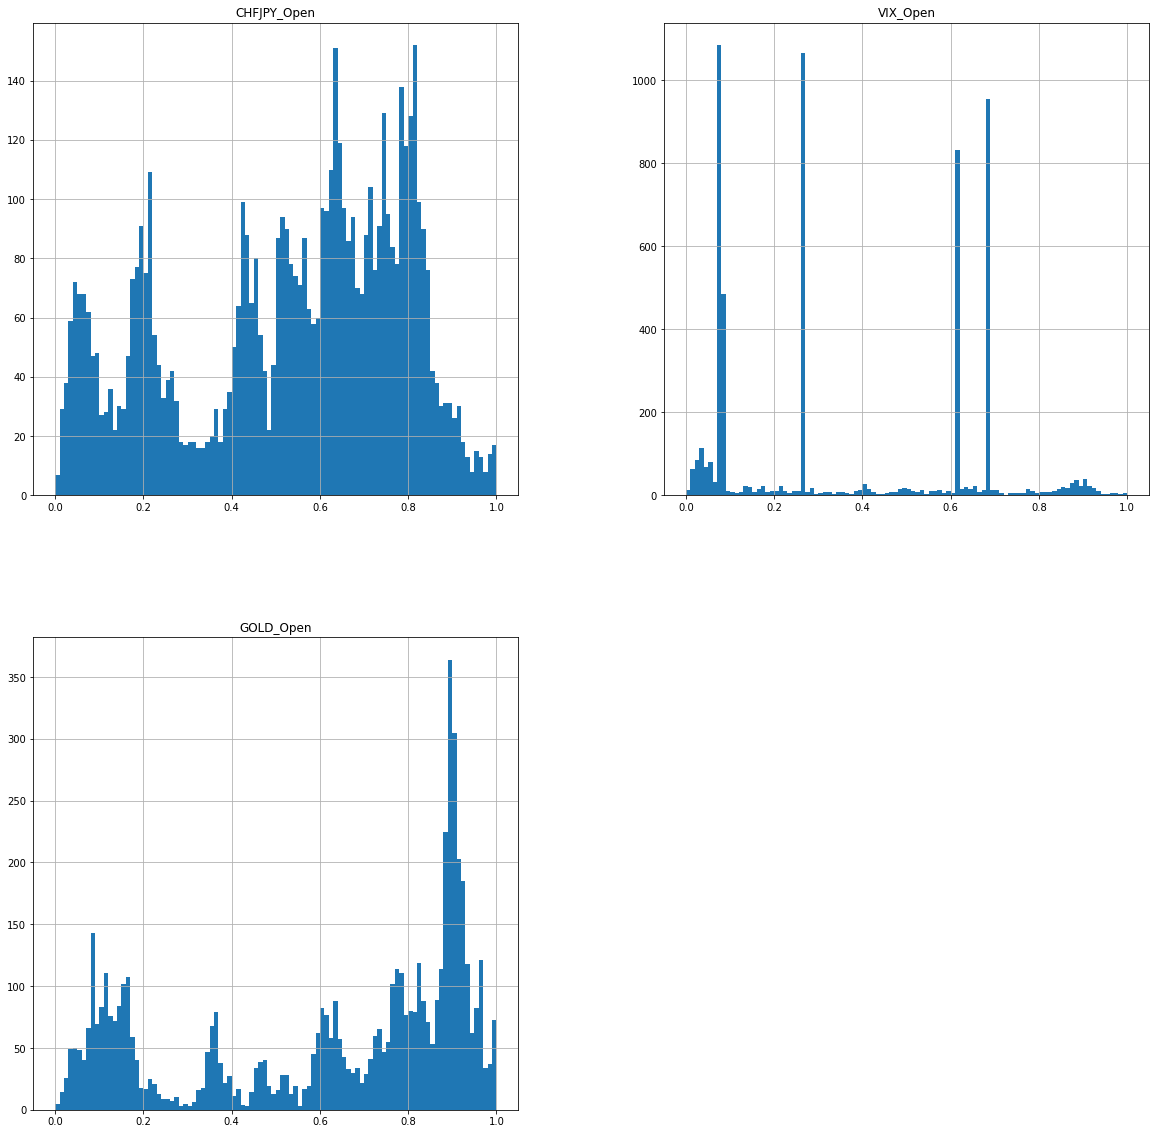

array([[<AxesSubplot:title={'center':'CHFJPY_Vol'}>,
        <AxesSubplot:title={'center':'VIX_Vol'}>],
       [<AxesSubplot:title={'center':'GOLD_Vol'}>, <AxesSubplot:>]],
      dtype=object)

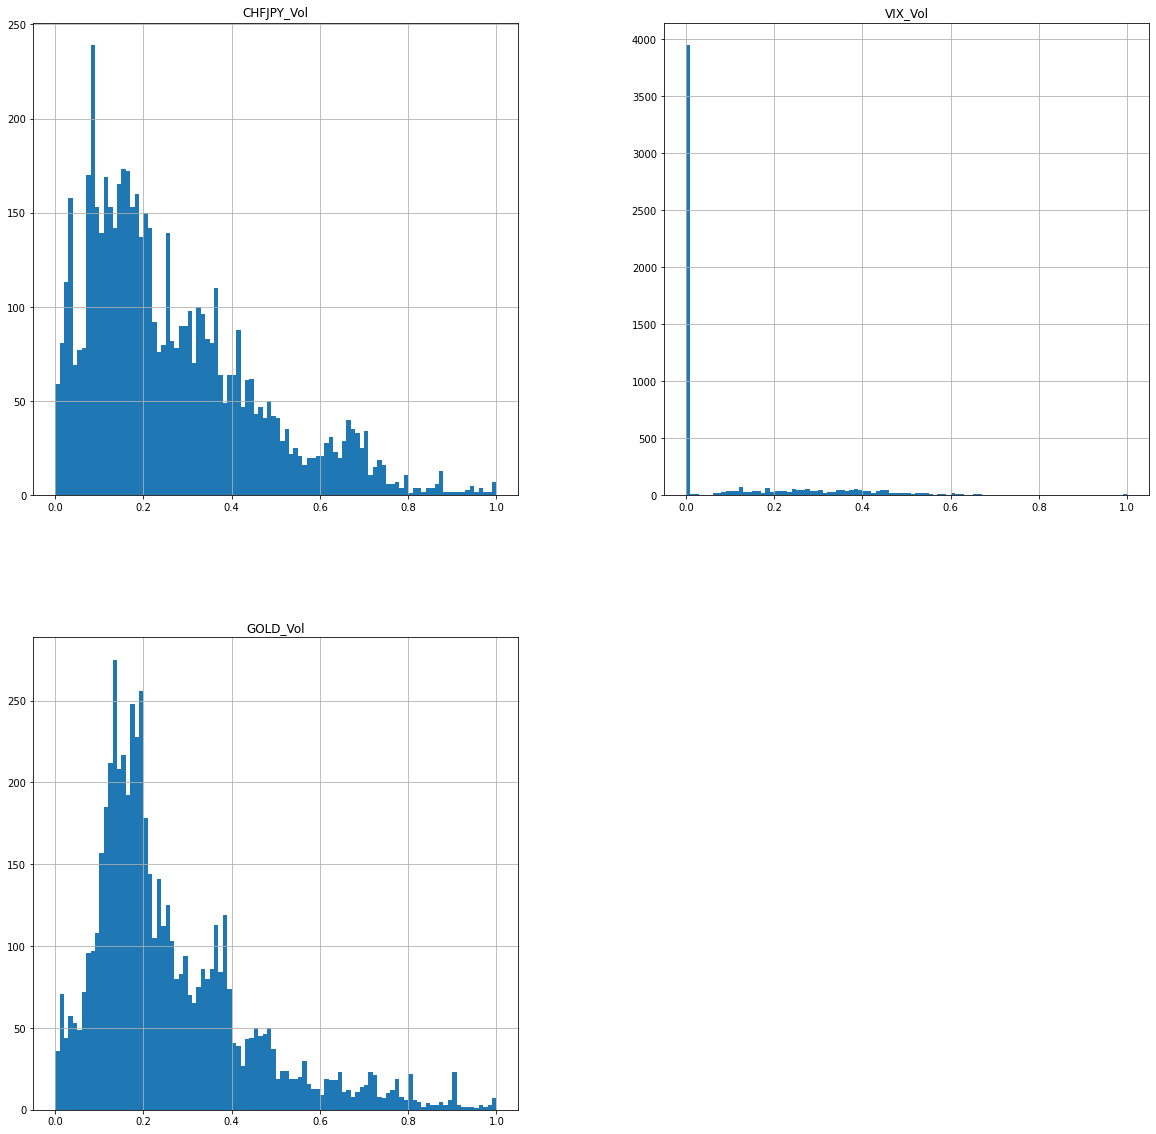

In [87]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title('Open Histogram')
train[list(filter(lambda x: '_Open' in x, train.columns))].hist(ax=ax, bins=100)
plt.show()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
train[list(filter(lambda x: '_Vol' in x, train.columns))].hist(ax=ax, bins=100)

# Train Batch

In [88]:
trainShifted = train[['CHFJPY_Mean', 'CHFJPY_Vol', 'VIX_Vol', 'VIX_Mean', 'GOLD_Vol', 'GOLD_Mean']]
SHIFT_ARRAY = [5, 10, 15, 20, 40, 60]
trainColumns = trainShifted.columns
for sf in SHIFT_ARRAY:
    shifted = trainShifted.shift(sf)
    for column in trainColumns:
        trainShifted[f"SHIFTED_{sf}_{column}"] = shifted[column]
del trainColumns
trainShifted = trainShifted.iloc[max(SHIFT_ARRAY):]
train = train.iloc[max(SHIFT_ARRAY):]
train = train.merge(trainShifted[list(filter(lambda x: x not in train.columns, trainShifted.columns))], left_index=True, right_index=True)
train

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2688/1778362070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainShifted[f"SHIFTED_{sf}_{column}"] = shifted[column]


,CHFJPY_Open,CHFJPY_High,CHFJPY_Low,CHFJPY_Close,VIX_Open,VIX_High,VIX_Low,VIX_Close,FiniteVixData,GOLD_Open,...,SHIFTED_40_VIX_Vol,SHIFTED_40_VIX_Mean,SHIFTED_40_GOLD_Vol,SHIFTED_40_GOLD_Mean,SHIFTED_60_CHFJPY_Mean,SHIFTED_60_CHFJPY_Vol,SHIFTED_60_VIX_Vol,SHIFTED_60_VIX_Mean,SHIFTED_60_GOLD_Vol,SHIFTED_60_GOLD_Mean
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-20 07:40:00+01:00,0.891464,0.876811,0.891868,0.883663,0.080236,0.077966,0.081356,0.079526,1.0,0.736686,...,0.000000e+00,0.059730,0.164421,0.788146,0.888436,0.248678,0.000000e+00,0.059730,0.155042,0.784382
2022-04-20 07:41:00+01:00,0.887805,0.876412,0.891868,0.884882,0.080236,0.077966,0.081356,0.079526,1.0,0.739645,...,0.000000e+00,0.059730,0.165033,0.788099,0.889755,0.246151,0.000000e+00,0.059730,0.156616,0.784710
2022-04-20 07:42:00+01:00,0.889430,0.879226,0.891868,0.887721,0.080236,0.077966,0.081356,0.079526,1.0,0.736686,...,0.000000e+00,0.059730,0.164514,0.788130,0.891184,0.246065,0.000000e+00,0.059730,0.159199,0.785101
2022-04-20 07:43:00+01:00,0.891868,0.886474,0.895877,0.888933,0.080236,0.077966,0.081356,0.079526,1.0,0.735207,...,0.000000e+00,0.059730,0.168162,0.787943,0.892538,0.239316,0.000000e+00,0.059730,0.162454,0.785491
2022-04-20 07:44:00+01:00,0.890242,0.883255,0.887866,0.882853,0.080236,0.077966,0.081356,0.079526,1.0,0.732249,...,0.000000e+00,0.059730,0.173441,0.787631,0.893813,0.232322,0.000000e+00,0.059730,0.165922,0.785960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26 10:37:00+01:00,0.084146,0.077295,0.086903,0.067691,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,8.201764e-07,0.656935,0.369882,0.075371,0.045756,0.298025,8.201764e-07,0.656935,0.399746,0.077229
2022-04-26 10:38:00+01:00,0.069105,0.069641,0.082900,0.067691,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,8.201764e-07,0.656935,0.366666,0.075152,0.045994,0.299532,8.201764e-07,0.656935,0.399954,0.077245
2022-04-26 10:39:00+01:00,0.073986,0.080914,0.090905,0.085120,0.617399,0.618644,0.613559,0.610829,1.0,0.164201,...,8.201764e-07,0.656935,0.364613,0.075012,0.046219,0.301051,8.201764e-07,0.656935,0.400346,0.077276


# Test Batch

In [89]:
testB = test
testB[testB.columns] = scalePandas.transform(testB[testB.columns])
testShifted = testB[['CHFJPY_Mean', 'CHFJPY_Vol', 'VIX_Vol', 'VIX_Mean', 'GOLD_Vol', 'GOLD_Mean']]
SHIFT_ARRAY = [5, 10, 15, 20, 40, 60]
trainColumns = testShifted.columns
for sf in SHIFT_ARRAY:
    shifted = testShifted.shift(sf)
    for column in trainColumns:
        testShifted[f"SHIFTED_{sf}_{column}"] = shifted[column]
del trainColumns
testShifted = testShifted.iloc[max(SHIFT_ARRAY):]
testB = testB.iloc[max(SHIFT_ARRAY):]
testB = testB.merge(testShifted[list(filter(lambda x: x not in testB.columns, testShifted.columns))], left_index=True, right_index=True)
testB

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2688/2905636943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testShifted[f"SHIFTED_{sf}_{column}"] = shifted[column]


,CHFJPY_Open,CHFJPY_High,CHFJPY_Low,CHFJPY_Close,VIX_Open,VIX_High,VIX_Low,VIX_Close,FiniteVixData,GOLD_Open,...,SHIFTED_40_VIX_Vol,SHIFTED_40_VIX_Mean,SHIFTED_40_GOLD_Vol,SHIFTED_40_GOLD_Mean,SHIFTED_60_CHFJPY_Mean,SHIFTED_60_CHFJPY_Vol,SHIFTED_60_VIX_Vol,SHIFTED_60_VIX_Mean,SHIFTED_60_GOLD_Vol,SHIFTED_60_GOLD_Mean
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-26 11:42:00+01:00,0.115445,0.113526,0.130956,0.112688,0.617399,0.618644,0.613559,0.610829,1.0,0.192308,...,8.201764e-07,0.656935,0.193633,0.122896,0.058371,0.181467,8.201764e-07,0.656935,0.247696,0.109355
2022-04-26 11:43:00+01:00,0.115042,0.117955,0.122944,0.122417,0.617399,0.618644,0.613559,0.610829,1.0,0.195266,...,8.201764e-07,0.656935,0.185451,0.123786,0.058366,0.181473,8.201764e-07,0.656935,0.236888,0.110370
2022-04-26 11:44:00+01:00,0.123577,0.132047,0.138967,0.128899,0.617399,0.618644,0.613559,0.610829,1.0,0.187869,...,8.201764e-07,0.656935,0.177634,0.124738,0.058556,0.180818,8.201764e-07,0.656935,0.227352,0.111323
2022-04-26 11:45:00+01:00,0.132112,0.125197,0.142566,0.124848,0.617399,0.618644,0.613559,0.610829,1.0,0.190829,...,8.201764e-07,0.656935,0.170988,0.125613,0.058909,0.179758,8.201764e-07,0.656935,0.223256,0.112166
2022-04-26 11:46:00+01:00,0.121952,0.130032,0.138967,0.123227,0.617399,0.618644,0.613559,0.610829,1.0,0.195266,...,8.201764e-07,0.656935,0.167939,0.126659,0.059019,0.179957,8.201764e-07,0.656935,0.219828,0.113072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27 19:18:00+01:00,-0.228050,-0.231481,-0.213459,-0.236323,0.894426,0.907627,0.898305,0.908629,0.0,-0.044379,...,2.909871e-01,0.968722,0.136323,-0.114212,-0.287249,0.047053,3.342373e-01,0.977389,0.277248,-0.128533
2022-04-27 19:19:00+01:00,-0.230488,-0.233496,-0.218268,-0.233076,0.904561,0.908475,0.908475,0.906091,0.0,-0.044379,...,2.857744e-01,0.968215,0.134925,-0.113322,-0.287324,0.045858,3.334882e-01,0.977248,0.275259,-0.128127
2022-04-27 19:20:00+01:00,-0.239835,-0.227863,-0.213459,-0.226594,0.904561,0.904237,0.894915,0.891709,0.0,-0.042900,...,2.807076e-01,0.967708,0.132512,-0.112478,-0.287381,0.044917,3.329457e-01,0.977154,0.259543,-0.127190


# Forest

In [92]:
data = train.drop(['Target'], axis=1).values
target = train.Target
forest = RandomForestClassifier(verbose=1, n_estimators=20, min_samples_leaf=43, criterion='entropy', n_jobs=-1,
                                max_depth=34, min_samples_split=40)
forest.fit(X=data, y=target)
# Train Score
print('Train Score', forest.score(X=data, y=target))

testData = testB.drop(['Target'], axis=1).values
testTarget = testB.Target
# Test Score
print('Test Score', forest.score(X=testData, y=testTarget))

Train Score 0.9914030261348006
Test Score 0.4460242232754081


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


# Ridge Classifier

In [102]:
classifier = SKmodels.RidgeClassifier(alpha=1)
classifier.fit(X=data, y=target)
# Train Score
print('Train Score', classifier.score(X=data, y=target))
# Test Score
print('Test Score', classifier.score(X=testData, y=testTarget))

Train Score 0.93707015130674
Test Score 0.8783570300157978


In [109]:
print(classifier.predict(testData))

[0. 0. 0. ... 0. 0. 0.]


(array([0., 1.]), array([1052,  847]))

In [96]:
classifier = SKmodels.LogisticRegression(penalty='elasticnet', l1_ratio=0.4, C=0.5, solver='saga')
classifier.fit(X=trainShifted.values, y=train.Target)
# Train Score
print('Train Score', classifier.score(X=trainShifted.values, y=train.Target))
# Test Score
print('Test Score', classifier.score(X=testShifted.values, y=testB.Target))

Train Score 0.7396836313617606
Test Score 0.4460242232754081
